In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from clover.over_sampling import ClusterOverSampler

df = pd.read_csv("data/processed_data.csv")

# Generating Balanced Dataset with Over-sampling

In [12]:
# Calculating ratio of majority and minority class
def ratio(df):
    print(df['STATUS'].value_counts())
    print(df['STATUS'].value_counts(normalize=True))
    print()

ratio(df)

1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64



In [13]:
non_int = ["ID", "TOTAL_GOOD_DEBT", "TOTAL_BAD_DEBT"]
for col in df:
    if df[col].dtypes == "object":
        non_int.append(col)
new_df = df.drop(columns=non_int)

In [14]:
# Considering numeric vars only
# Creating clustering (K-means) and then over-sampling (SMOTE - Synthetic Minority Over-sampling TEchnique)

# Dictionary to store top 5 variables - {score : var_name}
top = {}

y = pd.DataFrame(new_df["STATUS"])
for col in new_df:
    if col != 'STATUS' and col != 'GOOD_PERCENT':
        X = pd.DataFrame(new_df[col])
    
        # Create KMeans-ROS instance
        smote = SMOTE(random_state=13)
        kmeans = KMeans(n_clusters=8, random_state=17)
        kmeans_smote = ClusterOverSampler(oversampler=smote, clusterer=kmeans)

        # Fit and resample imbalanced data
        X_res, y_res = kmeans_smote.fit_resample(X, y)
        print(col)
        ratio(y_res)

        # Split the Dataset into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2)

        # Decision Tree using Train Data
        dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
        dectree.fit(X_train, y_train)                    # train the decision tree model
        y_train_pred = dectree.predict(X_train)
        print("Train Data for " +  col)
        score = dectree.score(X_train, y_train)
        print(f'Accuracy  :\t{score}')
        print()
        
        if len(top) < 5:
            top[score] = col
        elif score > min(top.keys()):
            top.pop(min(top.keys()))
            top[score] = col

print()
print('BEST VARIABLES')
for key, val in top.items():
    print(f'{val}      \t: {key}')

C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)
C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)


FLAG_OWN_CAR
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_OWN_CAR
Accuracy  :	0.7892005190138737

FLAG_OWN_REALTY
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_OWN_REALTY
Accuracy  :	0.8260055893801777

CNT_CHILDREN
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for CNT_CHILDREN
Accuracy  :	0.628430981135842

AMT_INCOME_TOTAL
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for AMT_INCOME_TOTAL
Accuracy  :	0.9778421000099811

FLAG_MOBIL
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_MOBIL
Accuracy  :	0.5004740992114981



C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)
C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)


FLAG_WORK_PHONE
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_WORK_PHONE
Accuracy  :	0.6360165685198124

FLAG_PHONE
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_PHONE
Accuracy  :	0.6457231260604851



C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)
C:\Users\iwcm3\anaconda3\lib\site-packages\clover\over_sampling\_cluster.py:419: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.clusterer_.fit(X, y, **fit_params)


FLAG_EMAIL
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for FLAG_EMAIL
Accuracy  :	0.9491965265994611

CNT_FAM_MEMBERS
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for CNT_FAM_MEMBERS
Accuracy  :	0.8102355524503444

APPLICANT_AGE
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for APPLICANT_AGE
Accuracy  :	0.8306717237249226

YEARS_WORKING
1    25048
0    25048
Name: STATUS, dtype: int64
1    0.5
0    0.5
Name: STATUS, dtype: float64

Train Data for YEARS_WORKING
Accuracy  :	0.9224223974448548


BEST VARIABLES
FLAG_OWN_REALTY      	: 0.8260055893801777
AMT_INCOME_TOTAL      	: 0.9778421000099811
FLAG_EMAIL      	: 0.9491965265994611
APPLICANT_AGE      	: 0.8306717237249226
YEARS_WORKING      	: 0.9224223974448548


# Prediction Using Balanced Dataset

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

'''Over-sampling'''

y1 = pd.DataFrame(new_df['STATUS'])
print('Before Over-sampling: ')
ratio(y1)

best = top.values()
for col in new_df:
    if col not in best:
        new_df.drop(columns=col, inplace=True)
x1 = pd.DataFrame(new_df)
print(x1.describe())
print()

X_temp, y_temp = kmeans_smote.fit_resample(x1, y1)
print('After Over-sampling: ')
ratio(y_temp)


'''Prediction'''

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_temp, y_temp, test_size=0.2)

dectree = DecisionTreeClassifier(max_depth = 3) # create the decision tree object
dectree.fit(X_train1, y_train1)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train1)
y_test_pred1 = dectree.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test1, y_test1))
print()

Before Over-sampling: 
1    25048
0       86
Name: STATUS, dtype: int64
1    0.996578
0    0.003422
Name: STATUS, dtype: float64

       FLAG_OWN_REALTY  AMT_INCOME_TOTAL    FLAG_EMAIL  APPLICANT_AGE  \
count     25134.000000      2.513400e+04  25134.000000   25134.000000   
mean          0.654930      1.948339e+05      0.100660      40.536166   
std           0.475401      1.045110e+05      0.300885       9.559474   
min           0.000000      2.700000e+04      0.000000      21.000000   
25%           0.000000      1.350000e+05      0.000000      33.000000   
50%           1.000000      1.800000e+05      0.000000      40.000000   
75%           1.000000      2.250000e+05      0.000000      48.000000   
max           1.000000      1.575000e+06      1.000000      67.000000   

       YEARS_WORKING  
count   25134.000000  
mean        7.204106  
std         6.414231  
min         0.000000  
25%         3.000000  
50%         5.000000  
75%        10.000000  
max        43.000000  

Afte

<AxesSubplot:>

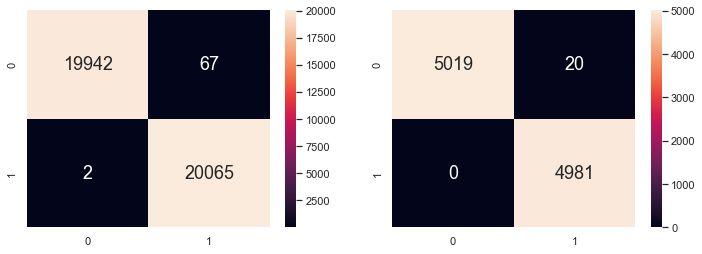

In [16]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.5769230769230769, 0.875, 'AMT_INCOME_TOTAL <= 573750.0\ngini = 0.5\nsamples = 40076\nvalue = [20009, 20067]\nclass = Good'),
 Text(0.3076923076923077, 0.625, 'AMT_INCOME_TOTAL <= 413796.5\ngini = 0.007\nsamples = 19923\nvalue = [67, 19856]\nclass = Good'),
 Text(0.15384615384615385, 0.375, 'AMT_INCOME_TOTAL <= 77625.0\ngini = 0.006\nsamples = 19520\nvalue = [60, 19460]\nclass = Good'),
 Text(0.07692307692307693, 0.125, 'gini = 0.018\nsamples = 792\nvalue = [7, 785]\nclass = Good'),
 Text(0.23076923076923078, 0.125, 'gini = 0.006\nsamples = 18728\nvalue = [53, 18675]\nclass = Good'),
 Text(0.46153846153846156, 0.375, 'AMT_INCOME_TOTAL <= 422796.5\ngini = 0.034\nsamples = 403\nvalue = [7, 396]\nclass = Good'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Bad'),
 Text(0.5384615384615384, 0.125, 'gini = 0.029\nsamples = 402\nvalue = [6, 396]\nclass = Good'),
 Text(0.8461538461538461, 0.625, 'APPLICANT_AGE <= 29.5\ngini = 0.021\nsamples = 20153

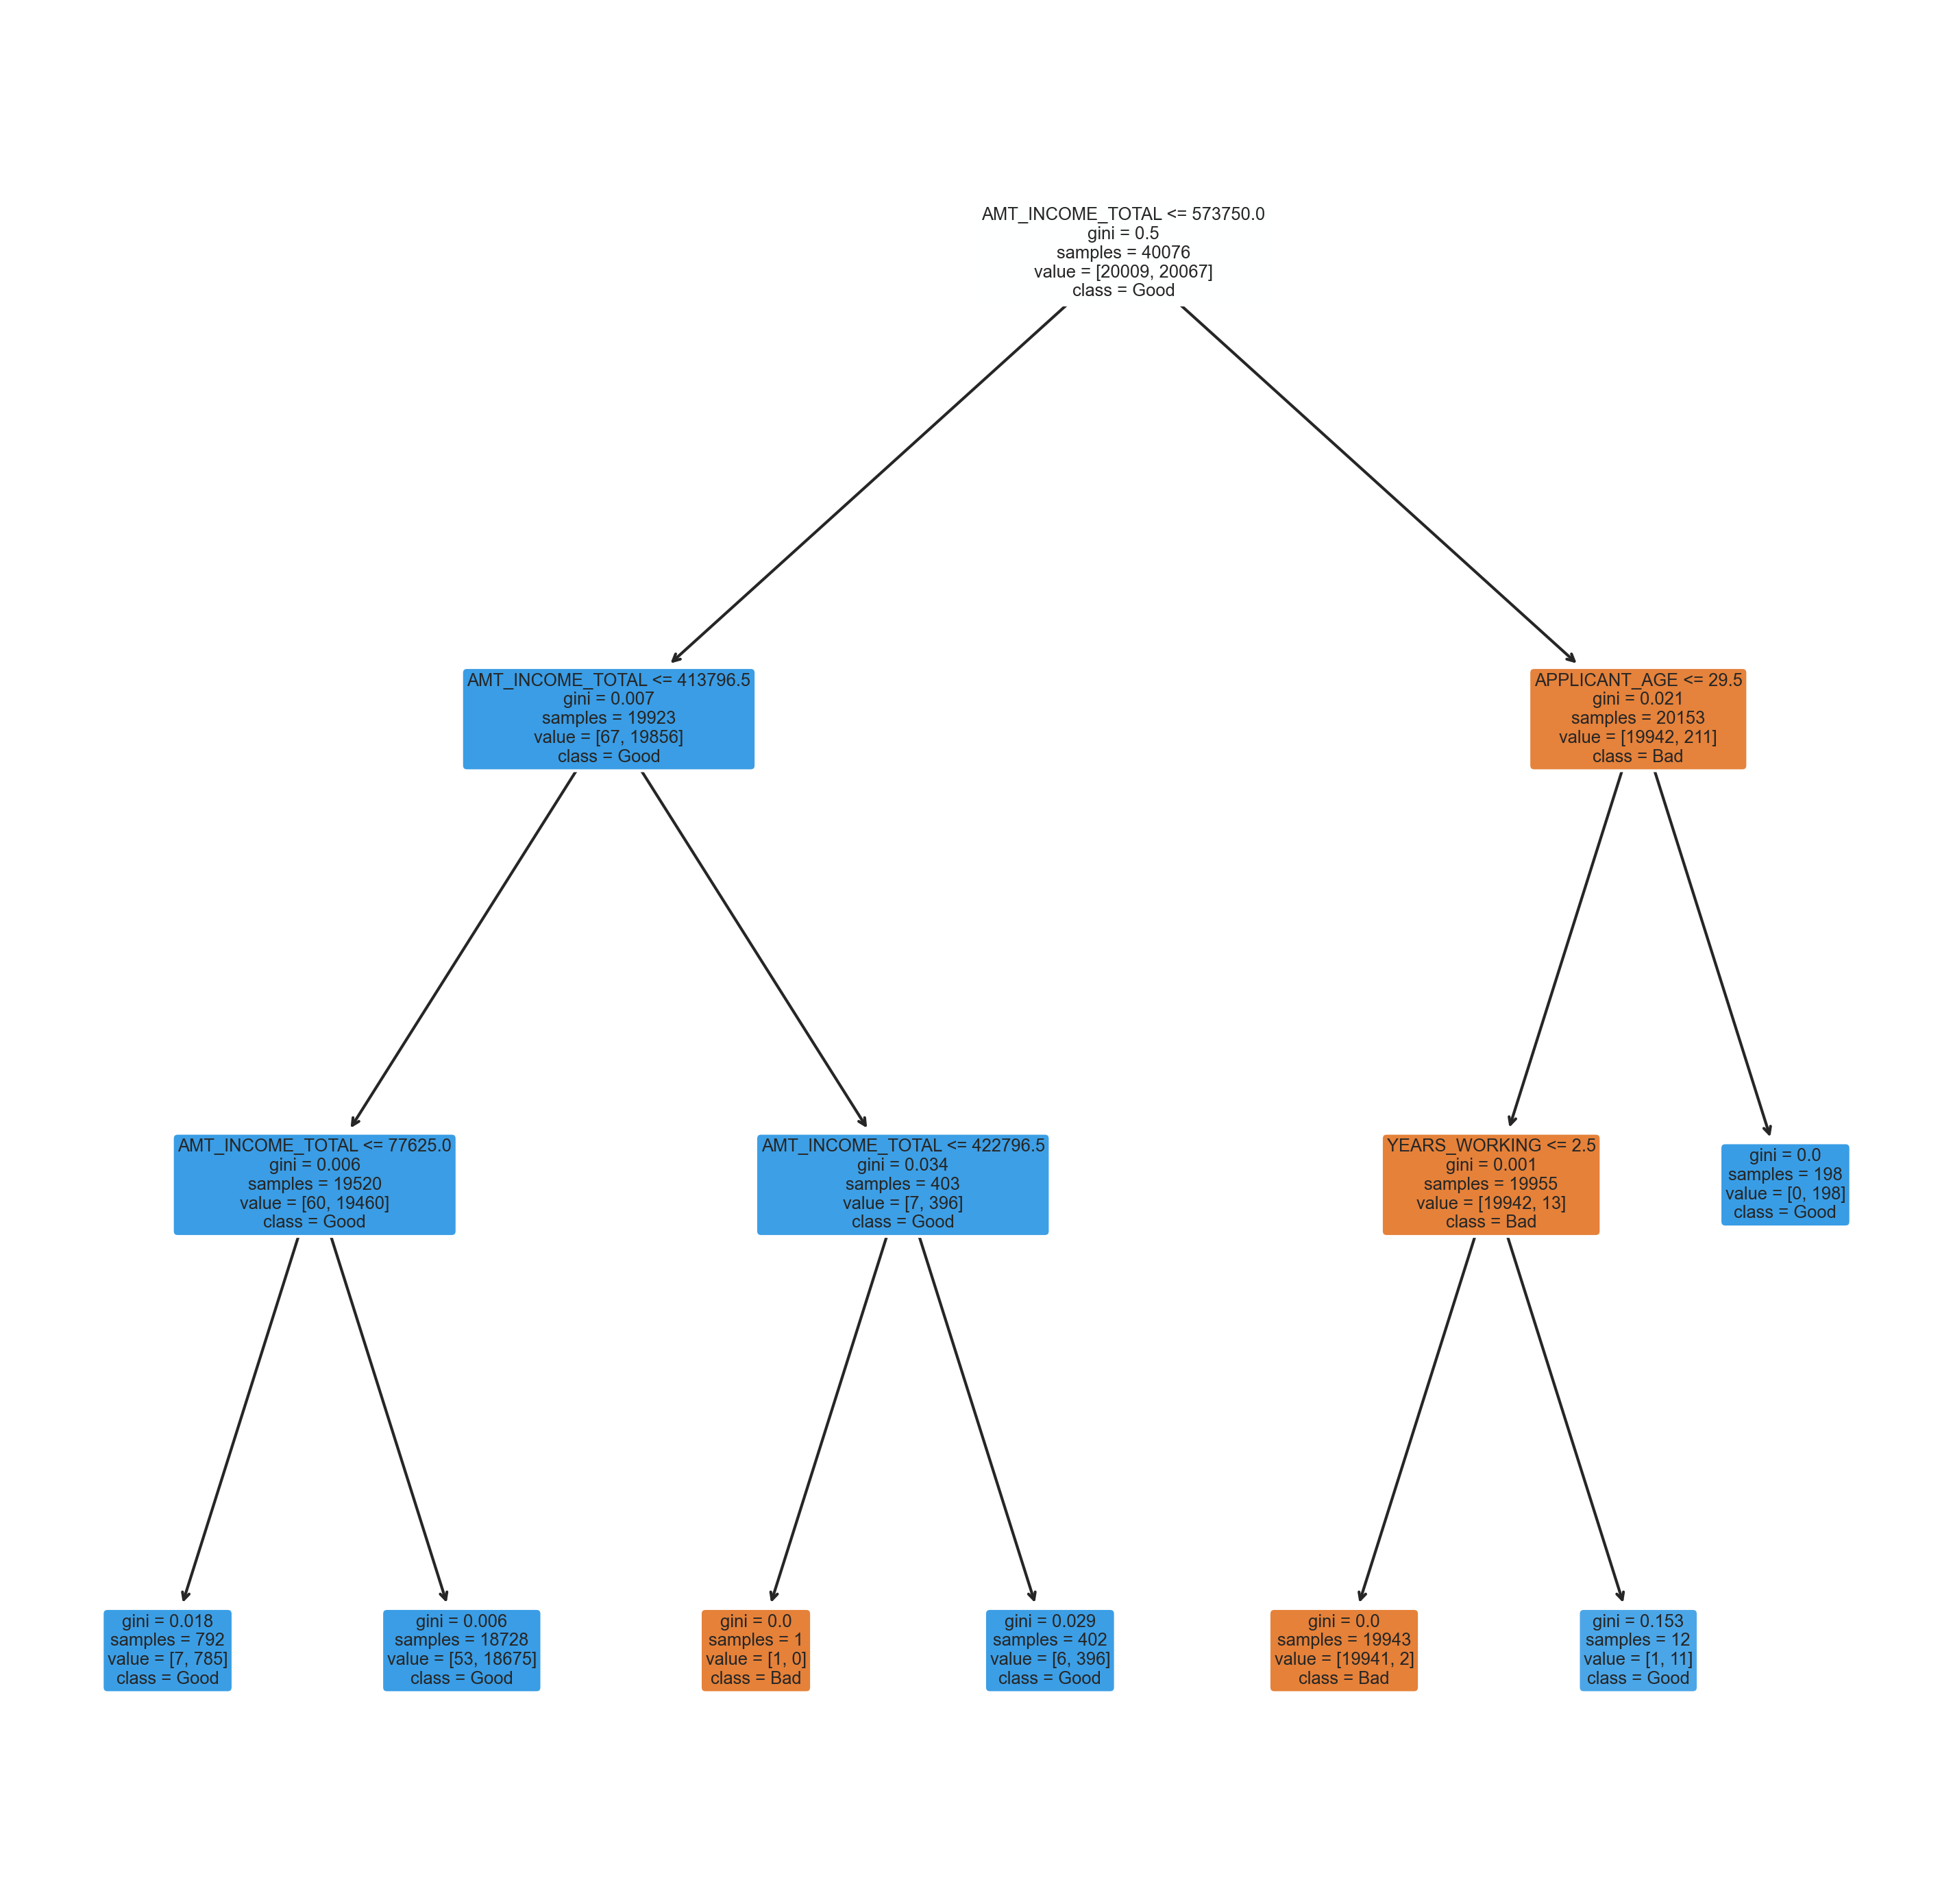

In [17]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12), dpi = 300)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train1.columns, 
          class_names=["Bad","Good"])